In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
general_data = pd.read_csv(filename)
general_data.head()

Saving bestsellers with categories.csv to bestsellers with categories (1).csv


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [12]:
general_data.shape

(550, 7)

Перший графік: Розподіл рейтингу користувачів

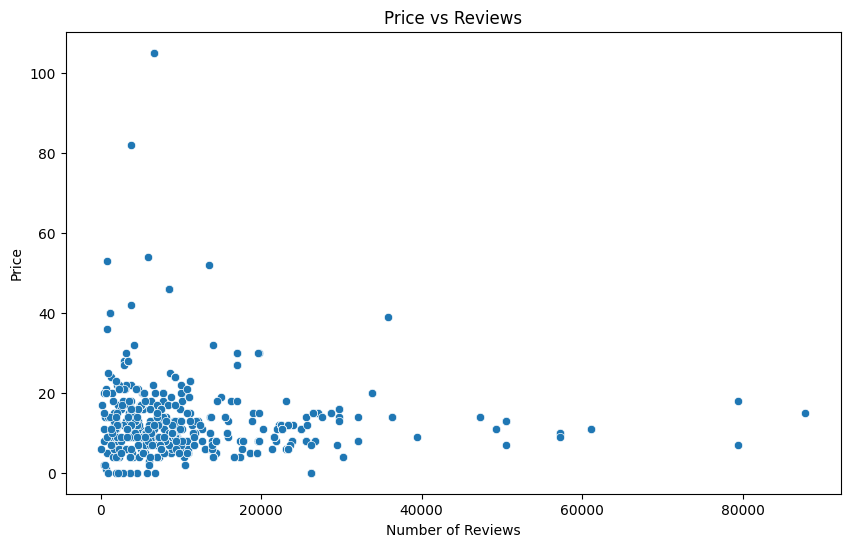

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=general_data, x='reviews', y='price')
plt.title('Price vs Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()



Другий графік: Залежність ціни від кількості рецензій

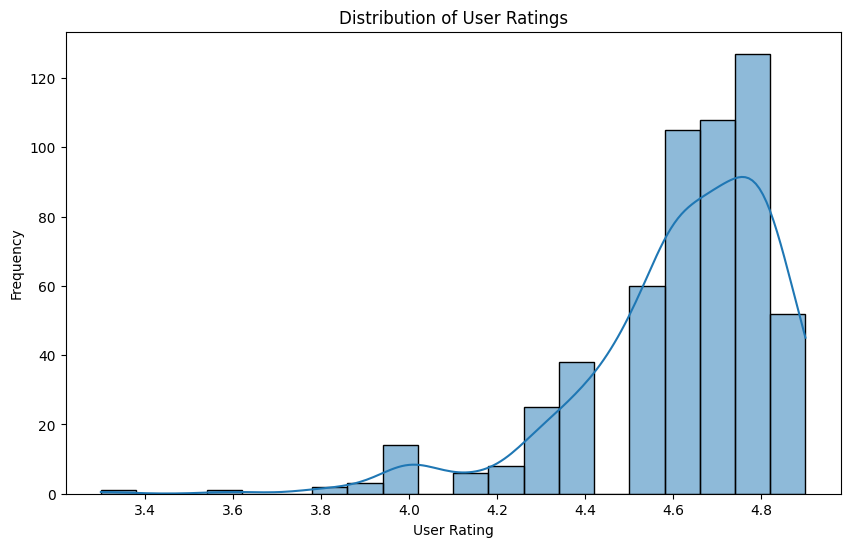

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(general_data['user_rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()

Третій графік: Середня ціна для кожного року

<ipython-input-54-e6d73521eb4d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=year_price_agg, x='year', y='price', palette='Blues_d')


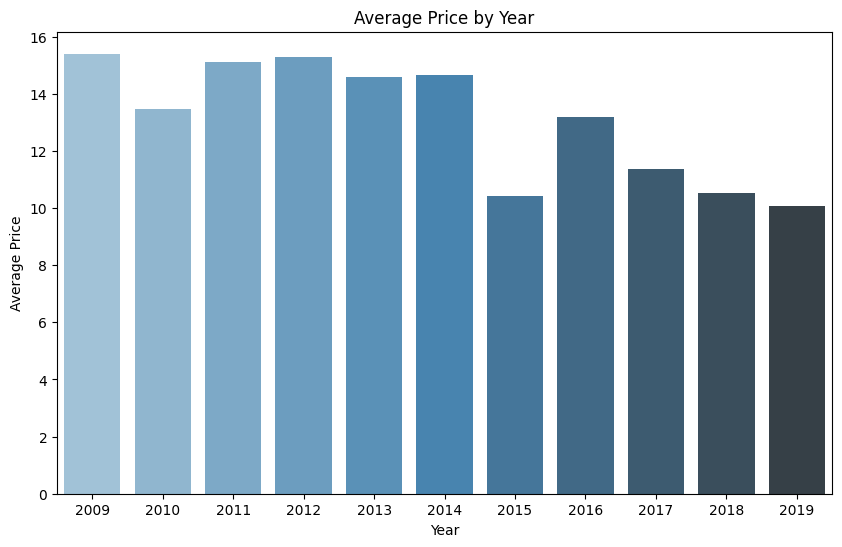

In [54]:
year_price_agg = general_data.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=year_price_agg, x='year', y='price', palette='Blues_d')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

Відповідь: Про скільки книг зберігає дані датасет? - 550

In [13]:
general_data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
general_data.head()


,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [14]:
missing_percentage = general_data.isnull().sum() / len(general_data)
missing_percentage *= 100
print(missing_percentage)

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64


Відповідь: Чи є в якихось змінних пропуски? - Ні

In [15]:
unique_genres = general_data['genre'].unique()

print(unique_genres)

['Non Fiction' 'Fiction']


Які є унікальні жанри? - ['Non Fiction' 'Fiction']

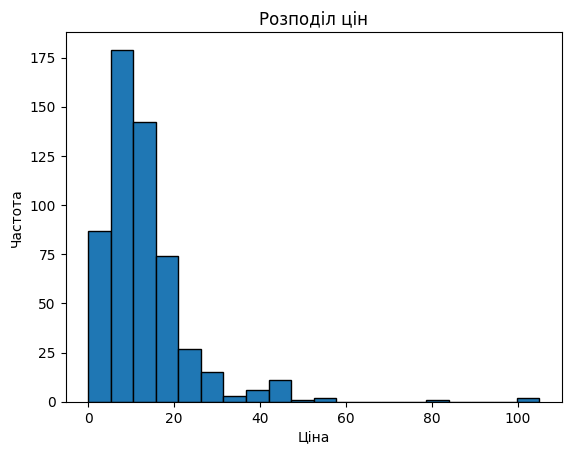

In [16]:
general_data['price'].plot(kind='hist', bins=20, edgecolor='black', title='Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

In [17]:
max_price = general_data['price'].max()
min_price = general_data['price'].min()
mean_price = general_data['price'].mean()
median_price = general_data['price'].median()

print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Відповідь: Максимальна ціна? - 105
Відповідь: Мінімальна ціна? - 0
Відповідь: Середня ціна? - 13.1
Відповідь: Медіанна ціна? - 11.0

In [18]:
highest_rating = general_data['user_rating'].max()
print(f"Найвищий рейтинг у датасеті: {highest_rating}")

Найвищий рейтинг у датасеті: 4.9


In [19]:
count_highest_rating = general_data[general_data['user_rating'] == highest_rating].shape[0]
print(f"Кількість книг з найвищим рейтингом: {count_highest_rating}")

Кількість книг з найвищим рейтингом: 52


In [20]:
most_reviews = general_data.loc[general_data['reviews'].idxmax()]['name']
print(f"Книга з найбільшою кількістю відгуків: {most_reviews}")

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


In [21]:
top_50_2015 = general_data[general_data['year'] == 2015]
most_expensive_book_2015 = top_50_2015.loc[top_50_2015['price'].idxmax()]['name']
print(f"Найдорожча книга з Топ-50 у 2015 році: {most_expensive_book_2015}")

Найдорожча книга з Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


In [22]:
fiction_2010_count = general_data[(general_data['year'] == 2010) & (general_data['genre'] == 'Fiction')].shape[0]
print(f"Кількість книг жанру Fiction у Топ-50 у 2010 році: {fiction_2010_count}")

Кількість книг жанру Fiction у Топ-50 у 2010 році: 20


In [23]:
high_rating_2010_2011 = general_data[(general_data['user_rating'] == 4.9) & (general_data['year'].isin([2010, 2011]))].shape[0]
print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: {high_rating_2010_2011}")

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


In [24]:
sorted_books_2015_under_8 = top_50_2015[top_50_2015['price'] < 8].sort_values(by='price')
last_book_in_sorted_list = sorted_books_2015_under_8['name'].iloc[-1] if not sorted_books_2015_under_8.empty else 'No book under $8 in 2015'
print(f"Остання книга у відсортованому списку: {last_book_in_sorted_list}")

Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [25]:
genre_price_agg = general_data.groupby('genre')['price'].agg(['max', 'min']).reset_index()


max_price_fiction = genre_price_agg[genre_price_agg['genre'] == 'Fiction']['max'].values[0]
min_price_fiction = genre_price_agg[genre_price_agg['genre'] == 'Fiction']['min'].values[0]
max_price_non_fiction = genre_price_agg[genre_price_agg['genre'] == 'Non Fiction']['max'].values[0]
min_price_non_fiction = genre_price_agg[genre_price_agg['genre'] == 'Non Fiction']['min'].values[0]

print(f"Максимальна ціна для жанру Fiction: {max_price_fiction}")
print(f"Мінімальна ціна для жанру Fiction: {min_price_fiction}")
print(f"Максимальна ціна для жанру Non Fiction: {max_price_non_fiction}")
print(f"Мінімальна ціна для жанру Non Fiction: {min_price_non_fiction}")

Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


In [28]:
author_book_count = general_data.groupby('author')['genre'].count().reset_index().rename(columns={'genre': 'Book Count'})


table_shape = author_book_count.shape


most_books_author = author_book_count.loc[author_book_count['Book Count'].idxmax()]

print(f"Розмірність таблиці: {table_shape}")
print(f"Автор з найбільшою кількістю книг: {most_books_author['author']}")
print(f"Кількість книг цього автора: {most_books_author['Book Count']}")

Розмірність таблиці: (248, 2)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12


In [32]:
author_avg_rating = general_data.groupby('author')['user_rating'].mean().reset_index().rename(columns={'Rating': 'Average Rating'})

min_avg_rating_author = author_avg_rating.loc[author_avg_rating['user_rating'].idxmin()]

print(f"Автор з мінімальним середнім рейтингом: {min_avg_rating_author['author']}")
print(f"Середній рейтинг цього автора: {min_avg_rating_author['user_rating']}")

Автор з мінімальним середнім рейтингом: Donna Tartt
Середній рейтинг цього автора: 3.9


In [33]:
combined_df = pd.concat([author_book_count.set_index('author'), author_avg_rating.set_index('author')], axis=1).reset_index()


sorted_df = combined_df.sort_values(by=['Book Count', 'user_rating'])


first_author = sorted_df.iloc[0]['author']

print(f"Перший автор у списку: {first_author}")

Перший автор у списку: Muriel Barbery
